In [605]:
#importing all the required python libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
# from shapely.geometry import Point
# import folium
# from folium.plugins import MarkerCluster
# from folium.plugins import FastMarkerCluster


###### Importing the Airlines performance data for the month before the onset of COVID i.e. Feb20

In [606]:
#States= gpd.read_file('../data/US_States.geojson')

###### The following code will make all the out put dataframes be in a table format 

In [607]:

%%HTML
<style type ="text/css">
table.dataframe td, table.dataframe th {
    border: 1px black solid  !important;
 color: black !important;
}

In [608]:
Airports=pd.read_csv('../data/All_us-airports.csv')

In [609]:
Airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,region_name,iso_region,local_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,3632,KLAX,large_airport,Los Angeles International Airport,33.942501,-118.407997,125.0,NaN,United States,US,California,US-CA,CA,Los Angeles,1,KLAX,LAX,LAX,https://www.flylax.com/,https://en.wikipedia.org/wiki/Los_Angeles_Inte...,NaN,1335475,2020-04-26T22:37:22+00:00
1,3754,KORD,large_airport,Chicago O'Hare International Airport,41.978600,-87.904800,672.0,NaN,United States,US,Illinois,US-IL,IL,Chicago,1,KORD,ORD,ORD,https://www.flychicago.com/ohare/home/pages/de...,https://en.wikipedia.org/wiki/O'Hare_Internati...,"CHI, Orchard Place",1503175,2018-09-16T02:35:35+00:00
2,3622,KJFK,large_airport,John F Kennedy International Airport,40.639801,-73.778900,13.0,NaN,United States,US,New York,US-NY,NY,New York,1,KJFK,JFK,JFK,https://www.jfkairport.com/,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild",1052075,2020-04-26T22:35:58+00:00
3,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1026.0,NaN,United States,US,Georgia,US-GA,GA,Atlanta,1,KATL,ATL,ATL,http://www.atlanta-airport.com/,https://en.wikipedia.org/wiki/Hartsfield–Jacks...,NaN,2002475,2018-09-19T14:50:01+00:00
4,3878,KSFO,large_airport,San Francisco International Airport,37.618999,-122.375000,13.0,NaN,United States,US,California,US-CA,CA,San Francisco,1,KSFO,SFO,SFO,http://www.flysfo.com/,https://en.wikipedia.org/wiki/San_Francisco_In...,"QSF, QBA",1112475,2008-06-13T14:30:04+00:00


In [476]:
# column_sort ={'id','type','latitude_deg','longitude_deg','region_name','gps_code','iata_code','local_code'} 
# Airport_state =Airports[column_sort].reset_index()
Airport_state=Airports.loc[:,['id','type','name','latitude_deg','longitude_deg','region_name','gps_code','iata_code','local_code']]

In [610]:
Airport_state.head()

,id,type,name,latitude_deg,longitude_deg,state,icao_code,iata_code,local_code
0,3632,large_airport,Los Angeles International Airport,33.942501,-118.407997,California,KLAX,LAX,LAX
1,3754,large_airport,Chicago O'Hare International Airport,41.978600,-87.904800,Illinois,KORD,ORD,ORD
2,3622,large_airport,John F Kennedy International Airport,40.639801,-73.778900,New York,KJFK,JFK,JFK
3,3384,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,Georgia,KATL,ATL,ATL
4,3878,large_airport,San Francisco International Airport,37.618999,-122.375000,California,KSFO,SFO,SFO


In [478]:
Airport_state.shape

(23945, 9)

In [479]:
Airport_state.rename(columns ={'region_name':'state','gps_code':'icao_code'},inplace = True)

In [480]:
#Airport_state_clean.head(1)
Airport_state.head()

,id,type,name,latitude_deg,longitude_deg,state,icao_code,iata_code,local_code
0,3632,large_airport,Los Angeles International Airport,33.942501,-118.407997,California,KLAX,LAX,LAX
1,3754,large_airport,Chicago O'Hare International Airport,41.978600,-87.904800,Illinois,KORD,ORD,ORD
2,3622,large_airport,John F Kennedy International Airport,40.639801,-73.778900,New York,KJFK,JFK,JFK
3,3384,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,Georgia,KATL,ATL,ATL
4,3878,large_airport,San Francisco International Airport,37.618999,-122.375000,California,KSFO,SFO,SFO


###### Reading all the three monthly flight performnce sample datasets ( Feb20,Aug20,Feb21) 

In [611]:
OTPFeb20 =pd.read_csv('../data/Airlines OTP February20.csv',low_memory=False)
OTPAug20 =pd.read_csv('../data/Airlines OTP August20.csv',low_memory=False)
OTPFeb21 = pd.read_csv('../data/Airlines OTP February21.csv',low_memory=False)

In [613]:
# OTPFeb20.head()
# OTPAug20.head()
OTPFeb21.head()

,Year,QUARTER,Month,DayofMonth,DayOfWeek,FlightDate,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,DOT_ID_Marketing_Airline,Marketing_Id,Flight_Number_Marketing_Airline,SCH_OP_UNIQUE_CARRIER,SCH_OP_CARRIER_AIRLINE_ID,SCH_OP_CARRIER,SCH_OP_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,IATA_Code_Marketing_Airline,TAIL_NUM,Flight_Number_Operating_Airline,OriginAirportID,ORIGIN_AIRPORT_SEQ_ID,OriginCityMarketID,Origin,...,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 119,Duplicate
0,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1432,NaN,NaN,NaN,NaN,DL,19790,DL,N363NW,1432,14893,1489302,33192,SMF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1434,NaN,NaN,NaN,NaN,DL,19790,DL,N349NW,1434,10397,1039707,30397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1434,NaN,NaN,NaN,NaN,DL,19790,DL,N349NW,1434,11042,1104205,30647,CLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1435,NaN,NaN,NaN,NaN,DL,19790,DL,N964AT,1435,10397,1039707,30397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,2,21,7,2/21/2021,DL,DL,19790,DL,1435,NaN,NaN,NaN,NaN,DL,19790,DL,N964AT,1435,11057,1105703,31057,CLT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
OTPFeb20.columns
OTPFeb20.shape

(623103, 119)

In [484]:
OTPFeb20.shape

(623103, 119)

In [485]:
OTPFeb21.describe()

,Year,QUARTER,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,SCH_OP_CARRIER_AIRLINE_ID,SCH_OP_CARRIER_FL_NUM,OP_CARRIER_AIRLINE_ID,Flight_Number_Operating_Airline,OriginAirportID,ORIGIN_AIRPORT_SEQ_ID,OriginCityMarketID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DestAirportID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRSDepTime,DepTime,DepDelay,...,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 119,Duplicate
count,350170.0,350170.0,350170.0,350170.000000,350170.000000,350170.000000,350170.000000,18.000000,18.000000,350170.000000,350170.000000,350170.000000,3.501700e+05,350170.000000,350170.000000,350170.000000,350170.000000,3.501700e+05,350170.000000,350170.000000,350170.000000,350170.000000,330183.000000,330167.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2021.0,1.0,2.0,14.773559,4.050427,19838.189551,2886.903450,20399.611111,5493.055556,20035.269195,2886.903450,12647.718200,1.264776e+06,31749.343465,27.188728,56.154722,12647.592492,1.264763e+06,31749.334746,27.189202,56.153077,1301.798549,1303.495053,5.391787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.046534,2.012131,258.894117,1827.881569,16.313614,311.632225,372.083254,1827.881569,1548.247214,1.548244e+05,1368.797520,16.992094,25.842310,1548.252299,1.548249e+05,1368.770416,16.992049,25.842352,444.056309,450.800435,48.707188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021.0,1.0,2.0,1.000000,1.000000,19393.000000,1.000000,20378.000000,4970.000000,19393.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,1.000000,5.000000,1.000000,-59.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021.0,1.0,2.0,8.000000,2.000000,19790.000000,1261.000000,20397.000000,5223.750000,19790.000000,1261.000000,11292.000000,1.129202e+06,30559.000000,12.000000,34.000000,11292.000000,1.129202e+06,30559.000000,12.000000,34.000000,926.000000,928.000000,-7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021.0,1.0,2.0,15.000000,4.000000,19805.000000,2634.000000,20397.000000,5618.000000,19977.000000,2634.000000,12478.000000,1.247805e+06,31453.000000,26.000000,53.000000,12478.000000,1.247805e+06,31453.000000,26.000000,53.000000,1300.000000,1306.000000,-4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021.0,1.0,2.0,22.000000,6.000000,19977.000000,4641.000000,20397.000000,5620.000000,20397.000000,4641.000000,14057.000000,1.405702e+06,32575.000000,45.000000,82.000000,14057.000000,1.405702e+06,32575.000000,45.000000,82.000000,1646.000000,1651.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021.0,1.0,2.0,28.000000,7.000000,20436.000000,9658.000000,20452.000000,6145.000000,20500.000000,9658.000000,16869.000000,1.686901e+06,36101.000000,78.000000,93.000000,16869.000000,1.686901e+06,36101.000000,78.000000,93.000000,2359.000000,2400.000000,2791.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Removing all the unnecessary columns from OTPFeb20 Data frame and Keep the data frame one the remaining columns 

In [618]:

# OTPFeb20 = OTPFeb20.loc[['Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
# 'Flight_Number_Marketing_Airline','Operating_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
# 'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
# 'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
# 'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
# 'TotalAddGTime','DivAirportLandings','Duplicate']]

column ={'Year','Month','DayofMonth','DayOfWeek','FlightDate','DOT_ID_Marketing_Airline','IATA_Code_Marketing_Airline',
'Flight_Number_Marketing_Airline','Flight_Number_Operating_Airline','OriginAirportID','OriginCityMarketID','Origin',
'OriginCityName','OriginState','OriginStateName','DestAirportID','Dest','DestCityName','DestState','DestStateName','CRSDepTime',
'DepTime','DepDelay','DepDelayMinutes','TaxiOut','WheelsOff','WheelsOn','TaxiIn','CRSArrTime','ArrTime','ArrDelay','ArrDelayMinutes',
'Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime','AirTime','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay',
'TotalAddGTime','DivAirportLandings','Duplicate'}
pd.set_option('display.max_columns', 48)
#Restricting the dataframes on the above mentioned columns only 
OTPFeb20_Clean=OTPFeb20[column]
OTPAug20_Clean=OTPAug20[column]
OTPFeb21_Clean=OTPFeb21[column]



In [619]:
#Expaling the info using the color and/or formating style in the out put, to do that the follwing class defintion is used 
OTPFeb20_Clean.rename(columns = {'IATA_Code_Marketing_Airline' :'IATA'},inplace=True)
OTPAug20_Clean.rename(columns = {'IATA_Code_Marketing_Airline' :'IATA'},inplace=True)
OTPFeb21_Clean.rename(columns = {'IATA_Code_Marketing_Airline' :'IATA'},inplace=True)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep20 Performance data looks like below !'+color.END)
display(OTPFeb20_Clean.head())
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Aug20 Performance data looks like below !'+color.END)
display(OTPAug20_Clean.head())
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep21 Performance data looks like below !'+color.END)
display(OTPFeb21_Clean.head())




Fep20 Performance data looks like below !


C:\Users\yamar\anaconda3\envs\geospatial\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,IATA,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay
0,AA,13139,61.0,1430.0,1450.0,0.0,3300,20.0,LYH,2,-8.0,NaN,Virginia,North Carolina,0,2/1/2020,NC,1539,36.0,0,2020,1526.0,31057,NaN,"Lynchburg, VA",-4.0,19805,"Charlotte, NC",65,1531.0,N,0.0,1,VA,11057,3300,5.0,1434,NaN,NaN,NaN,6,CLT,0,NaN
1,AA,13139,66.0,1442.0,1459.0,8.0,3300,17.0,LYH,2,9.0,NaN,Virginia,North Carolina,0,2/8/2020,NC,1539,40.0,0,2020,1539.0,31057,NaN,"Lynchburg, VA",8.0,19805,"Charlotte, NC",65,1548.0,N,9.0,8,VA,11057,3300,9.0,1434,NaN,NaN,NaN,6,CLT,0,NaN
2,AA,14814,69.0,2247.0,2315.0,12.0,3300,28.0,SHV,2,18.0,NaN,Louisiana,Texas,0,2/13/2020,TX,2338,39.0,0,2020,2354.0,30194,0.0,"Shreveport, LA",12.0,19805,"Dallas/Fort Worth, TX",63,2356.0,N,18.0,13,LA,11298,3300,2.0,2235,6.0,12.0,0.0,4,DFW,0,0.0
3,AA,14814,51.0,2230.0,2245.0,0.0,3300,15.0,SHV,2,-17.0,NaN,Louisiana,Texas,0,2/14/2020,TX,2338,32.0,0,2020,2317.0,30194,NaN,"Shreveport, LA",-5.0,19805,"Dallas/Fort Worth, TX",63,2321.0,N,0.0,14,LA,11298,3300,4.0,2235,NaN,NaN,NaN,5,DFW,0,NaN
4,AA,14814,62.0,2246.0,2312.0,11.0,3300,26.0,SHV,2,10.0,NaN,Louisiana,Texas,0,2/15/2020,TX,2338,31.0,0,2020,2343.0,30194,NaN,"Shreveport, LA",11.0,19805,"Dallas/Fort Worth, TX",63,2348.0,N,10.0,15,LA,11298,3300,5.0,2235,NaN,NaN,NaN,6,DFW,0,NaN




Aug20 Performance data looks like below !


,IATA,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay
0,WN,10821,195.0,1542.0,1551.0,0.0,1443,9.0,BWI,8,-8.0,NaN,Maryland,Colorado,0.0,8/24/2020,CO,2105,183.0,0,2020,2054.0,30325,NaN,"Baltimore, MD",-3.0,19393,"Denver, CO",200.0,2057.0,NaN,0.0,24,MD,11292,1443,3.0,1545,NaN,NaN,NaN,1,DEN,0,NaN
1,WN,11042,162.0,1950.0,2003.0,0.0,443,13.0,CLE,8,-8.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,40,144.0,0,2020,27.0,30325,NaN,"Cleveland, OH",-5.0,19393,"Denver, CO",165.0,32.0,NaN,0.0,24,OH,11292,443,5.0,1955,NaN,NaN,NaN,1,DEN,0,NaN
2,WN,11042,167.0,1332.0,1343.0,0.0,1572,11.0,CLE,8,-1.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,1820,151.0,0,2020,1814.0,30325,NaN,"Cleveland, OH",-3.0,19393,"Denver, CO",165.0,1819.0,NaN,0.0,24,OH,11292,1572,5.0,1335,NaN,NaN,NaN,1,DEN,0,NaN
3,WN,11066,159.0,1408.0,1418.0,0.0,204,10.0,CMH,8,-8.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,1855,147.0,0,2020,1845.0,30325,NaN,"Columbus, OH",-7.0,19393,"Denver, CO",160.0,1847.0,NaN,0.0,24,OH,11292,204,2.0,1415,NaN,NaN,NaN,1,DEN,0,NaN
4,WN,11066,161.0,1944.0,1957.0,0.0,1642,13.0,CMH,8,5.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,20,143.0,0,2020,20.0,30325,NaN,"Columbus, OH",-1.0,19393,"Denver, CO",155.0,25.0,NaN,5.0,24,OH,11292,1642,5.0,1945,NaN,NaN,NaN,1,DEN,0,NaN




Fep21 Performance data looks like below !


,IATA,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay
0,DL,14869,96.0,1338.0,1350.0,0.0,1432,12.0,SLC,2,-5.0,NaN,Utah,California,0,2/21/2021,CA,1619,80.0,0,2021,1610.0,33192,NaN,"Salt Lake City, UT",-7.0,19790,"Sacramento, CA",94,1614.0,NaN,0.0,21,UT,14893,1432,4.0,1345,NaN,NaN,NaN,7,SMF,0,NaN
1,DL,11042,88.0,1448.0,1458.0,147.0,1434,10.0,CLE,2,135.0,NaN,Ohio,Georgia,0,2/21/2021,GA,1401,73.0,0,2021,1611.0,30397,0.0,"Cleveland, OH",147.0,19790,"Atlanta, GA",100,1616.0,NaN,135.0,21,OH,10397,1434,5.0,1221,0.0,0.0,0.0,7,ATL,0,135.0
2,DL,10397,133.0,1711.0,1751.0,115.0,1434,40.0,ATL,2,139.0,NaN,Georgia,Ohio,0,2/21/2021,OH,1705,86.0,0,2021,1917.0,30647,0.0,"Atlanta, GA",115.0,19790,"Cleveland, OH",109,1924.0,NaN,139.0,21,GA,11042,1434,7.0,1516,24.0,105.0,0.0,7,CLE,0,10.0
3,DL,11057,58.0,1635.0,1647.0,0.0,1435,12.0,CLT,2,-21.0,NaN,North Carolina,Georgia,0,2/21/2021,GA,1754,40.0,0,2021,1727.0,30397,NaN,"Charlotte, NC",-5.0,19790,"Atlanta, GA",74,1733.0,NaN,0.0,21,NC,10397,1435,6.0,1640,NaN,NaN,NaN,7,ATL,0,NaN
4,DL,10397,77.0,1853.0,1921.0,0.0,1435,28.0,ATL,2,-10.0,NaN,Georgia,North Carolina,0,2/21/2021,NC,2020,43.0,0,2021,2004.0,31057,NaN,"Atlanta, GA",-6.0,19790,"Charlotte, NC",81,2010.0,NaN,0.0,21,GA,11057,1435,6.0,1859,NaN,NaN,NaN,7,CLT,0,NaN


In [620]:
pd.set_option('display.max_rows', 20)
display(OTPFeb21_Clean)

,IATA,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay
0,DL,14869,96.0,1338.0,1350.0,0.0,1432,12.0,SLC,2,-5.0,NaN,Utah,California,0,2/21/2021,CA,1619,80.0,0,2021,1610.0,33192,NaN,"Salt Lake City, UT",-7.0,19790,"Sacramento, CA",94,1614.0,NaN,0.0,21,UT,14893,1432,4.0,1345,NaN,NaN,NaN,7,SMF,0,NaN
1,DL,11042,88.0,1448.0,1458.0,147.0,1434,10.0,CLE,2,135.0,NaN,Ohio,Georgia,0,2/21/2021,GA,1401,73.0,0,2021,1611.0,30397,0.0,"Cleveland, OH",147.0,19790,"Atlanta, GA",100,1616.0,NaN,135.0,21,OH,10397,1434,5.0,1221,0.0,0.0,0.0,7,ATL,0,135.0
2,DL,10397,133.0,1711.0,1751.0,115.0,1434,40.0,ATL,2,139.0,NaN,Georgia,Ohio,0,2/21/2021,OH,1705,86.0,0,2021,1917.0,30647,0.0,"Atlanta, GA",115.0,19790,"Cleveland, OH",109,1924.0,NaN,139.0,21,GA,11042,1434,7.0,1516,24.0,105.0,0.0,7,CLE,0,10.0
3,DL,11057,58.0,1635.0,1647.0,0.0,1435,12.0,CLT,2,-21.0,NaN,North Carolina,Georgia,0,2/21/2021,GA,1754,40.0,0,2021,1727.0,30397,NaN,"Charlotte, NC",-5.0,19790,"Atlanta, GA",74,1733.0,NaN,0.0,21,NC,10397,1435,6.0,1640,NaN,NaN,NaN,7,ATL,0,NaN
4,DL,10397,77.0,1853.0,1921.0,0.0,1435,28.0,ATL,2,-10.0,NaN,Georgia,North Carolina,0,2/21/2021,NC,2020,43.0,0,2021,2004.0,31057,NaN,"Atlanta, GA",-6.0,19790,"Charlotte, NC",81,2010.0,NaN,0.0,21,GA,11057,1435,6.0,1859,NaN,NaN,NaN,7,CLT,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350165,YX,14321,68.0,1830.0,1848.0,5.0,3475,18.0,PWM,2,-1.0,2.0,Maine,New Jersey,0,2/27/2021,NJ,1939,47.0,0,2021,1935.0,31703,NaN,"Portland, ME",5.0,19977,"Newark, NJ",74,1938.0,NaN,0.0,27,ME,11618,3475,3.0,1825,NaN,NaN,NaN,6,EWR,0,NaN
350166,YX,12339,149.0,1900.0,1923.0,45.0,3414,23.0,IND,2,53.0,43.0,Indiana,New Jersey,0,2/28/2021,NJ,2036,118.0,0,2021,2121.0,31703,0.0,"Indianapolis, IN",45.0,19977,"Newark, NJ",141,2129.0,NaN,53.0,28,IN,11618,3414,8.0,1815,8.0,0.0,0.0,7,EWR,0,45.0
350167,YX,13930,117.0,1410.0,1425.0,445.0,3628,15.0,ORD,2,427.0,36.0,Illinois,Georgia,0,2/28/2021,GA,800,95.0,0,2021,1500.0,30397,0.0,"Chicago, IL",445.0,19977,"Atlanta, GA",135,1507.0,NaN,427.0,28,IL,10397,3628,7.0,645,0.0,0.0,0.0,7,ATL,0,427.0
350168,YX,11042,92.0,1128.0,1141.0,1013.0,3432,13.0,CLE,2,1005.0,NaN,Ohio,New Jersey,0,2/15/2021,NJ,2015,69.0,0,2021,1250.0,31703,106.0,"Cleveland, OH",1013.0,19977,"Newark, NJ",100,1300.0,NaN,1005.0,15,OH,11618,3432,10.0,1835,0.0,899.0,0.0,1,EWR,0,0.0


###### Including two calculated boolean fields into the data Frame , to calculate Departure and Arrival Delays  

In [621]:
# As an the best aviation practice a flights falls in irregualrity or major delay iff it delays for 15' or more 
# Hence here, the two calculated fields added to check weather a flight leg is delayed for 15'm or nor and assigigning a (1,0)<->(True,False)
# Numeric or boolean values .
#OTPFeb20_Clean['Dep_Delay15'] = OTPFeb20_Clean.loc[(OTPFeb20_Clean['DepDelayMinutes']>=15,1,0)]
OTPFeb20_Clean['Dep_Delay15'] = np.where(OTPFeb20_Clean['DepDelayMinutes']>=15,1,0)
OTPFeb20_Clean['Arr_Delay15'] = np.where(OTPFeb20_Clean['ArrDelayMinutes']>=15,1,0)
OTPAug20_Clean['Dep_Delay15'] = np.where(OTPAug20_Clean['DepDelayMinutes']>=15,1,0)
OTPAug20_Clean['Arr_Delay15'] = np.where(OTPAug20_Clean['ArrDelayMinutes']>=15,1,0)
OTPFeb21_Clean['Dep_Delay15'] = np.where(OTPFeb21_Clean['DepDelayMinutes']>=15,1,0)
OTPFeb21_Clean['Arr_Delay15'] = np.where(OTPFeb21_Clean['ArrDelayMinutes']>=15,1,0)

<ipython-input-621-a6ec1ea00f0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OTPFeb20_Clean['Dep_Delay15'] = np.where(OTPFeb20_Clean['DepDelayMinutes']>=15,1,0)
<ipython-input-621-a6ec1ea00f0d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OTPFeb20_Clean['Arr_Delay15'] = np.where(OTPFeb20_Clean['ArrDelayMinutes']>=15,1,0)
<ipython-input-621-a6ec1ea00f0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [489]:
#To capitallize the column names on the Aug20 and Feb21 dataframes the following code was utilized .
#OTPAug20.columns = [str(x).capitalize() for x in OTPAug20.columns]

###### Looking into the cleansed data frames with the checking of the departure and arrival delay value greater or equal to 15'

In [622]:
#Looking into the cleansed data frames with the checking of the departure and arrival delay value greater or equal to 15'
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BOLD = '\033[1m'
   END ='\033[0m'
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep20 Performance data looks like below !'+color.END)
display(OTPFeb20_Clean.head())
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Aug20 Performance data looks like below !'+color.END)
display(OTPAug20_Clean.head())
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep21 Performance data looks like below !'+color.END)
display(OTPFeb21_Clean.head())




Fep20 Performance data looks like below !


,IATA,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,AA,13139,61.0,1430.0,1450.0,0.0,3300,20.0,LYH,2,-8.0,NaN,Virginia,North Carolina,0,2/1/2020,NC,1539,36.0,0,2020,1526.0,31057,NaN,"Lynchburg, VA",-4.0,19805,"Charlotte, NC",65,1531.0,N,0.0,1,VA,11057,3300,5.0,1434,NaN,NaN,NaN,6,CLT,0,NaN,0,0
1,AA,13139,66.0,1442.0,1459.0,8.0,3300,17.0,LYH,2,9.0,NaN,Virginia,North Carolina,0,2/8/2020,NC,1539,40.0,0,2020,1539.0,31057,NaN,"Lynchburg, VA",8.0,19805,"Charlotte, NC",65,1548.0,N,9.0,8,VA,11057,3300,9.0,1434,NaN,NaN,NaN,6,CLT,0,NaN,0,0
2,AA,14814,69.0,2247.0,2315.0,12.0,3300,28.0,SHV,2,18.0,NaN,Louisiana,Texas,0,2/13/2020,TX,2338,39.0,0,2020,2354.0,30194,0.0,"Shreveport, LA",12.0,19805,"Dallas/Fort Worth, TX",63,2356.0,N,18.0,13,LA,11298,3300,2.0,2235,6.0,12.0,0.0,4,DFW,0,0.0,0,1
3,AA,14814,51.0,2230.0,2245.0,0.0,3300,15.0,SHV,2,-17.0,NaN,Louisiana,Texas,0,2/14/2020,TX,2338,32.0,0,2020,2317.0,30194,NaN,"Shreveport, LA",-5.0,19805,"Dallas/Fort Worth, TX",63,2321.0,N,0.0,14,LA,11298,3300,4.0,2235,NaN,NaN,NaN,5,DFW,0,NaN,0,0
4,AA,14814,62.0,2246.0,2312.0,11.0,3300,26.0,SHV,2,10.0,NaN,Louisiana,Texas,0,2/15/2020,TX,2338,31.0,0,2020,2343.0,30194,NaN,"Shreveport, LA",11.0,19805,"Dallas/Fort Worth, TX",63,2348.0,N,10.0,15,LA,11298,3300,5.0,2235,NaN,NaN,NaN,6,DFW,0,NaN,0,0




Aug20 Performance data looks like below !


,IATA,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,WN,10821,195.0,1542.0,1551.0,0.0,1443,9.0,BWI,8,-8.0,NaN,Maryland,Colorado,0.0,8/24/2020,CO,2105,183.0,0,2020,2054.0,30325,NaN,"Baltimore, MD",-3.0,19393,"Denver, CO",200.0,2057.0,NaN,0.0,24,MD,11292,1443,3.0,1545,NaN,NaN,NaN,1,DEN,0,NaN,0,0
1,WN,11042,162.0,1950.0,2003.0,0.0,443,13.0,CLE,8,-8.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,40,144.0,0,2020,27.0,30325,NaN,"Cleveland, OH",-5.0,19393,"Denver, CO",165.0,32.0,NaN,0.0,24,OH,11292,443,5.0,1955,NaN,NaN,NaN,1,DEN,0,NaN,0,0
2,WN,11042,167.0,1332.0,1343.0,0.0,1572,11.0,CLE,8,-1.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,1820,151.0,0,2020,1814.0,30325,NaN,"Cleveland, OH",-3.0,19393,"Denver, CO",165.0,1819.0,NaN,0.0,24,OH,11292,1572,5.0,1335,NaN,NaN,NaN,1,DEN,0,NaN,0,0
3,WN,11066,159.0,1408.0,1418.0,0.0,204,10.0,CMH,8,-8.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,1855,147.0,0,2020,1845.0,30325,NaN,"Columbus, OH",-7.0,19393,"Denver, CO",160.0,1847.0,NaN,0.0,24,OH,11292,204,2.0,1415,NaN,NaN,NaN,1,DEN,0,NaN,0,0
4,WN,11066,161.0,1944.0,1957.0,0.0,1642,13.0,CMH,8,5.0,NaN,Ohio,Colorado,0.0,8/24/2020,CO,20,143.0,0,2020,20.0,30325,NaN,"Columbus, OH",-1.0,19393,"Denver, CO",155.0,25.0,NaN,5.0,24,OH,11292,1642,5.0,1945,NaN,NaN,NaN,1,DEN,0,NaN,0,0




Fep21 Performance data looks like below !


,IATA,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,DestCityName,DepDelay,DOT_ID_Marketing_Airline,OriginCityName,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15
0,DL,14869,96.0,1338.0,1350.0,0.0,1432,12.0,SLC,2,-5.0,NaN,Utah,California,0,2/21/2021,CA,1619,80.0,0,2021,1610.0,33192,NaN,"Salt Lake City, UT",-7.0,19790,"Sacramento, CA",94,1614.0,NaN,0.0,21,UT,14893,1432,4.0,1345,NaN,NaN,NaN,7,SMF,0,NaN,0,0
1,DL,11042,88.0,1448.0,1458.0,147.0,1434,10.0,CLE,2,135.0,NaN,Ohio,Georgia,0,2/21/2021,GA,1401,73.0,0,2021,1611.0,30397,0.0,"Cleveland, OH",147.0,19790,"Atlanta, GA",100,1616.0,NaN,135.0,21,OH,10397,1434,5.0,1221,0.0,0.0,0.0,7,ATL,0,135.0,1,1
2,DL,10397,133.0,1711.0,1751.0,115.0,1434,40.0,ATL,2,139.0,NaN,Georgia,Ohio,0,2/21/2021,OH,1705,86.0,0,2021,1917.0,30647,0.0,"Atlanta, GA",115.0,19790,"Cleveland, OH",109,1924.0,NaN,139.0,21,GA,11042,1434,7.0,1516,24.0,105.0,0.0,7,CLE,0,10.0,1,1
3,DL,11057,58.0,1635.0,1647.0,0.0,1435,12.0,CLT,2,-21.0,NaN,North Carolina,Georgia,0,2/21/2021,GA,1754,40.0,0,2021,1727.0,30397,NaN,"Charlotte, NC",-5.0,19790,"Atlanta, GA",74,1733.0,NaN,0.0,21,NC,10397,1435,6.0,1640,NaN,NaN,NaN,7,ATL,0,NaN,0,0
4,DL,10397,77.0,1853.0,1921.0,0.0,1435,28.0,ATL,2,-10.0,NaN,Georgia,North Carolina,0,2/21/2021,NC,2020,43.0,0,2021,2004.0,31057,NaN,"Atlanta, GA",-6.0,19790,"Charlotte, NC",81,2010.0,NaN,0.0,21,GA,11057,1435,6.0,1859,NaN,NaN,NaN,7,CLT,0,NaN,0,0


In [491]:
display(OTPFeb20_Clean.shape)
display(OTPAug20_Clean.shape)
display(OTPFeb21_Clean.shape)


(623103, 47)

(398470, 47)

(350170, 47)

###### Export these raw but clean data into csv and saved them in the data folder

In [625]:
OTPFeb20_Clean.to_csv('../data/Py_exported_data/clean_Feb20.csv')
OTPAug20_Clean.to_csv('../data/Py_exported_data/clean_Aug20.csv')
OTPFeb21_Clean.to_csv('../data/Py_exported_data/clean_Feb21.csv')

In [551]:
US_Airlines = pd.read_csv('../data/US_airlines.csv')

In [552]:
US_Airlines.head()

,Airline ID,Name,IATA,ICAO,Callsign,Active
0,10,40-Mile Air,Q5,MLA,MILE-AIR,Y
1,22,Aloha Airlines,AQ,AAH,ALOHA,Y
2,24,American Airlines,AA,AAL,AMERICAN,Y
3,35,Allegiant Air,G4,AAY,ALLEGIANT,Y
4,109,Alaska Central Express,KO,AER,ACE AIR,Y


###### Calculating the number of Departure and Arrival flight delays (more than 15') ,grouped by Airport for each dataset  

In [519]:
#By_Origin_airport_Feb20 = OTPFeb20_Clean.groupby('Origin')
Num_depdly_ATapt_Feb20 =OTPFeb20_Clean.groupby('Origin')\
                        ['Dep_Delay15'].sum()
Num_arrdly_ATapt_Feb20 =OTPFeb20_Clean.groupby('Origin')\
                        ['Arr_Delay15'].sum()
Num_depdly_ATapt_Aug20 =OTPAug20_Clean.groupby('Origin')\
                        ['Dep_Delay15'].sum()
Num_arrdly_ATapt_Aug20 =OTPAug20_Clean.groupby('Origin')\
                        ['Arr_Delay15'].sum()
Num_depdly_ATapt_Feb21 =OTPFeb21_Clean.groupby('Origin')\
                        ['Dep_Delay15'].sum()
Num_arrdly_ATapt_Feb21 =OTPFeb21_Clean.groupby('Origin')\
                        ['Arr_Delay15'].sum()

###### Creating A filtered dataframe based on the departure and arrival delay at airport 

In [493]:
Airport_Delay_Feb20 = pd.DataFrame([Num_depdly_ATapt_Feb20 , Num_arrdly_ATapt_Feb20 ])


In [494]:
Airport_Delay_Feb20

Origin,ABE,ABI,ABQ,ABR,ABY,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,ALB,ALO,ALW,AMA,ANC,APN,ART,ASE,ATL,ATW,ATY,AUS,...,SWO,SYR,TLH,TOL,TPA,TRI,TTN,TUL,TUS,TVC,TWF,TXK,TYR,TYS,USA,VEL,VLD,VPS,WRG,XNA,XWA,YAK,YKM,YUM
Dep_Delay15,92,10,205,5,11,19,30,38,1,2,38,93,194,7,3,46,99,8,9,222,4669,91,12,562,...,5,232,99,35,985,70,45,124,197,51,12,9,19,248,24,7,12,104,11,165,16,4,18,14
Arr_Delay15,94,21,219,6,10,23,30,43,0,3,53,102,247,8,2,65,109,7,11,220,4352,86,13,545,...,6,276,97,41,939,79,57,155,200,50,10,14,24,296,29,6,15,104,12,194,19,7,20,16


###### To ger a better readbility and data set managment , the above data frame should change the orientation , using Transpose function

In [495]:
# Transposing the 'Airport_Delay_Feb20'data frame would change the orientation as below 
Airport_Delay_Feb20 = pd.DataFrame([Num_depdly_ATapt_Feb20, Num_arrdly_ATapt_Feb20 ]).T
#pd.set_option('display.max_rows', 365)
Airport_Delay_Feb20.head()

,Dep_Delay15,Arr_Delay15
Origin,,
ABE,92,94
ABI,10,21
ABQ,205,219
ABR,5,6
ABY,11,10


###### renaming the index , here that was unwantdly become index 0 (Origin) and renaming it 

In [496]:
#Airport_Delay_Feb20.rename_axis(none, axis=1).rename_axis('iata_code', axis=0)
#Airport_Delay_Feb20 = Airport_Delay_Feb20.rename_axis([None], axis=0).rename_axis('iata_code').reset_index()

In [497]:
Airport_Delay_Feb20

,iata_code,Dep_Delay15,Arr_Delay15
0,ABE,92,94
1,ABI,10,21
2,ABQ,205,219
3,ABR,5,6
4,ABY,11,10
5,ACT,19,23
6,ACV,30,30
7,ACY,38,43
8,ADK,1,0
9,ADQ,2,3


In [501]:
Airport_Delay_Feb20.columns

Index(['iata_code', 'Dep_Delay15', 'Arr_Delay15'], dtype='object')

In [528]:
Airport_Delay_Aug20 = pd.DataFrame([Num_depdly_ATapt_Aug20 , Num_arrdly_ATapt_Aug20 ]).T
Airport_Delay_Feb21 = pd.DataFrame([Num_depdly_ATapt_Feb21 , Num_arrdly_ATapt_Feb21 ]).T

In [529]:
# Airport_Delay_Aug20 = Airport_Delay_Aug20.rename_axis([None], axis=0).rename_axis('iata_code').reset_index()
Airport_Delay_Feb21 = Airport_Delay_Feb21.rename_axis([None], axis=0).rename_axis('iata_code').reset_index()
#display(Airport_Delay_Aug20)
display(Airport_Delay_Feb21)

,iata_code,Dep_Delay15,Arr_Delay15
0,ABE,26,49
1,ABI,17,28
2,ABQ,79,116
3,ABR,7,6
4,ABY,8,8
5,ACT,12,14
6,ACV,3,4
7,ACY,11,27
8,ADK,4,5
9,ADQ,5,7


In [530]:
#Airport_Delay_Feb20.rename(columns={'Dep_Delay15':'Num_depdly_ATapt_Feb20','Arr_Delay15':'Num_arrdly_ATapt_Feb20'},inplace=True)
#Airport_Delay_Aug20.rename(columns={'Dep_Delay15':'Num_depdly_ATapt_Aug20','Arr_Delay15':'Num_arrdly_ATapt_Aug20'},inplace=True)
Airport_Delay_Feb21.rename(columns={'Dep_Delay15':'Num_depdly_ATapt_Feb21','Arr_Delay15':'Num_arrdly_ATapt_Feb21'},inplace=True)
# Airport_Delay_Feb20['Total_delay']=Airport_Delay_Feb20['Num_depdly_ATapt_Feb20']+Airport_Delay_Feb20['Num_arrdly_ATapt_Feb20']
#Airport_Delay_Aug20['Total_delay']=Airport_Delay_Aug20['Num_depdly_ATapt_Aug20']+Airport_Delay_Aug20['Num_arrdly_ATapt_Aug20']
Airport_Delay_Feb21['Total_delay']=Airport_Delay_Feb21['Num_depdly_ATapt_Feb21']+Airport_Delay_Feb21['Num_arrdly_ATapt_Feb21']


In [539]:
Airport_Delay_Feb20
#Airport_Delay_Aug20
#Airport_Delay_Feb21

,iata_code,Dep_Delay15,Arr_Delay15
0,ABE,92,94
1,ABI,10,21
2,ABQ,205,219
3,ABR,5,6
4,ABY,11,10
5,ACT,19,23
6,ACV,30,30
7,ACY,38,43
8,ADK,1,0
9,ADQ,2,3


###### Sorting the Airports delay in ascending order , to see which Airports had the maximum number of , Arrival , Departure and Total delay per the months specified 

In [533]:
# Airport_Delay_Feb20_sort = Airport_Delay_Feb20.sort_values(by='Total_delay', ascending=False)
# Airport_Delay_Aug20_sort = Airport_Delay_Aug20.sort_values(by='Total_delay', ascending=False)
Airport_Delay_Feb21_sort = Airport_Delay_Feb21.sort_values(by='Total_delay', ascending=False)

# print("\n\n"+color.BOLD +'\033[1m' + color.BLUE +'\033[94m'+ 'Feb20 Data sorted down based on Total Airport delay data!'+color.END)
# display(Airport_Delay_Feb20_sort.head(10))
# print("\n\n"+color.BOLD +'\033[1m' + color.BLUE +'\033[94m'+ 'Aug20 Data sorted down based on Total Airport delay data!'+color.END)
# display(Airport_Delay_Aug20_sort.head(10))
# print("\n\n"+color.BOLD +'\033[1m' + color.BLUE +'\033[94m'+ 'Feb21 Data sorted down based on Total Airport delay data!'+color.END)
#display(Airport_Delay_Feb20_sort.head(10))
#display(Airport_Delay_Aug20_sort.head(10))
display(Airport_Delay_Feb21_sort.head(10))
#Airport_Delay.columns = ['Airport_code','Dep_Delay15','Arr_Delay15']

,iata_code,Num_depdly_ATapt_Feb21,Num_arrdly_ATapt_Feb21,Total_delay
94,DEN,2780,2960,5740
95,DFW,2729,2777,5506
249,ORD,1936,3135,5071
22,ATL,1725,1824,3549
72,CLT,1273,1487,2760
310,SEA,1212,1473,2685
103,DTW,717,1306,2023
214,MCO,1063,923,1986
322,SLC,828,946,1774
263,PHX,873,849,1722


###### Sample Plotting on the Total number of delays per Airport Feb20

<AxesSubplot:title={'center':'Number of delayed flights by Airport'}>

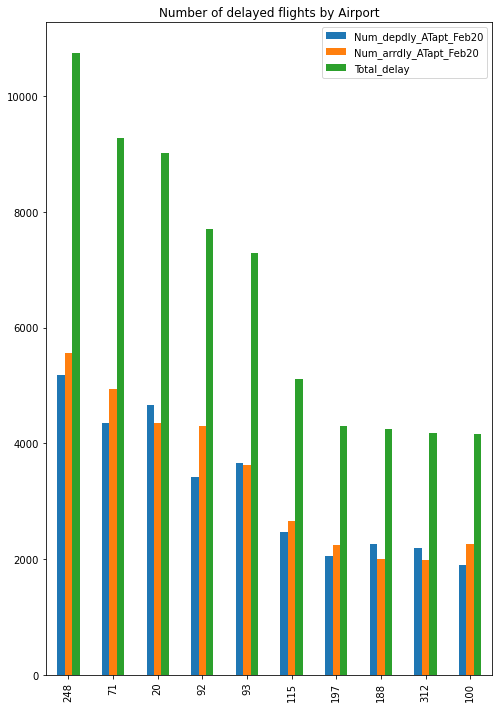

In [406]:
fig, ax = plt.subplots(figsize=(8,12))
Airport_Delay_Feb20_sort.head(10).plot.bar(title='Number of delayed flights by Airport',ax=ax)


In [140]:
#Airport_Delay['Airport_code']=Airport_Delay['index'] #= Airport_Delay.rename('index' , 'Airport Code')

###### Calculating the Number of Delays per state 

In [535]:
# Before Merging to The states Dataset at the begining , I need to merge the Result sets (Airports delay ) With the original cleansed data fra 
#Feb20_apt_state_delay = pd.merge(Airport_Delay_Feb20 , Airport_state, how ='left' , on='iata_code')
#Aug20_apt_state_delay = pd.merge(Airport_Delay_Aug20 , Airport_state, how ='left' , on='iata_code')
Feb21_apt_state_delay = pd.merge(Airport_Delay_Feb21 , Airport_state, how ='left' , on='iata_code')


In [536]:
Feb21_apt_state_delay

,iata_code,Num_depdly_ATapt_Feb21,Num_arrdly_ATapt_Feb21,Total_delay,id,type,name,latitude_deg,longitude_deg,state,icao_code,local_code
0,ABE,26,49,75,3356.0,medium_airport,Lehigh Valley International Airport,40.652100,-75.440804,Pennsylvania,KABE,ABE
1,ABI,17,28,45,3357.0,medium_airport,Abilene Regional Airport,32.411301,-99.681900,Texas,KABI,ABI
2,ABQ,79,116,195,16091.0,large_airport,Albuquerque International Sunport,35.040199,-106.609001,New Mexico,KABQ,ABQ
3,ABR,7,6,13,3358.0,medium_airport,Aberdeen Regional Airport,45.449100,-98.421799,South Dakota,KABR,ABR
4,ABY,8,8,16,3359.0,medium_airport,Southwest Georgia Regional Airport,31.535500,-84.194504,Georgia,KABY,ABY
5,ACT,12,14,26,3361.0,medium_airport,Waco Regional Airport,31.611300,-97.230499,Texas,KACT,ACT
6,ACV,3,4,7,3362.0,medium_airport,California Redwood Coast-Humboldt County Airport,40.978101,-124.109000,California,KACV,ACV
7,ACY,11,27,38,3363.0,medium_airport,Atlantic City International Airport,39.457600,-74.577202,New Jersey,KACY,ACY
8,ADK,4,5,9,16092.0,medium_airport,Adak Airport,51.877998,-176.645996,Alaska,PADK,ADK
9,ADQ,5,7,12,5353.0,medium_airport,Kodiak Airport,57.750000,-152.494003,Alaska,PADQ,ADQ


##### Exporting the output from the Python Query Results as a csv file and save to data folder 

In [597]:
#Feb20_apt_state_delay.to_csv('../data/OTP_apt_Feb20.csv')
Aug20_apt_state_delay.to_csv('../data/OTP_apt_Aug20.csv')
Feb21_apt_state_delay.to_csv('../data/OTP_apt_Feb21.csv')

###### Calculating the number of flight delays per Airline 

#### Merging the Airlines Dataframe with the Original But cleaned Airline performanced for the selected three months 

In [563]:
#Airlines data has to be imported and merged with the above clean data set on the Airlines iata code
Airlines_delay_Feb20 = pd.merge(OTPFeb20_Clean,US_Airlines,how ='left', on = 'IATA')
Airlines_delay_Aug20 = pd.merge(OTPAug20_Clean,US_Airlines,how ='left', on = 'IATA')
Airlines_delay_Feb21 = pd.merge(OTPFeb21_Clean,US_Airlines,how ='left', on = 'IATA')


# display(OTPFeb20_Clean.head())
# print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Aug20 Performance data looks like below !'+color.END)
# display(OTPAug20_Clean.head())
# print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Fep21 Performance data looks like below !'+color.END)
# display(OTPFeb21_Clean.head())

In [564]:
Airlines_delay_Feb20.head()
Airlines_delay_Aug20.head()
Airlines_delay_Feb21.head()


,IATA,DestAirportID,ActualElapsedTime,DepTime,WheelsOff,DepDelayMinutes,Flight_Number_Marketing_Airline,TaxiOut,Dest,Month,ArrDelay,TotalAddGTime,DestStateName,OriginStateName,DivAirportLandings,FlightDate,OriginState,CRSArrTime,AirTime,Diverted,Year,WheelsOn,OriginCityMarketID,WeatherDelay,...,CRSElapsedTime,ArrTime,Duplicate,ArrDelayMinutes,DayofMonth,DestState,OriginAirportID,Flight_Number_Operating_Airline,TaxiIn,CRSDepTime,NASDelay,LateAircraftDelay,SecurityDelay,DayOfWeek,Origin,Cancelled,CarrierDelay,Dep_Delay15,Arr_Delay15,Airline ID,Name,ICAO,Callsign,Active
0,DL,14869,96.0,1338.0,1350.0,0.0,1432,12.0,SLC,2,-5.0,NaN,Utah,California,0,2/21/2021,CA,1619,80.0,0,2021,1610.0,33192,NaN,...,94,1614.0,NaN,0.0,21,UT,14893,1432,4.0,1345,NaN,NaN,NaN,7,SMF,0,NaN,0,0,2009.0,Delta Air Lines,DAL,DELTA,Y
1,DL,11042,88.0,1448.0,1458.0,147.0,1434,10.0,CLE,2,135.0,NaN,Ohio,Georgia,0,2/21/2021,GA,1401,73.0,0,2021,1611.0,30397,0.0,...,100,1616.0,NaN,135.0,21,OH,10397,1434,5.0,1221,0.0,0.0,0.0,7,ATL,0,135.0,1,1,2009.0,Delta Air Lines,DAL,DELTA,Y
2,DL,10397,133.0,1711.0,1751.0,115.0,1434,40.0,ATL,2,139.0,NaN,Georgia,Ohio,0,2/21/2021,OH,1705,86.0,0,2021,1917.0,30647,0.0,...,109,1924.0,NaN,139.0,21,GA,11042,1434,7.0,1516,24.0,105.0,0.0,7,CLE,0,10.0,1,1,2009.0,Delta Air Lines,DAL,DELTA,Y
3,DL,11057,58.0,1635.0,1647.0,0.0,1435,12.0,CLT,2,-21.0,NaN,North Carolina,Georgia,0,2/21/2021,GA,1754,40.0,0,2021,1727.0,30397,NaN,...,74,1733.0,NaN,0.0,21,NC,10397,1435,6.0,1640,NaN,NaN,NaN,7,ATL,0,NaN,0,0,2009.0,Delta Air Lines,DAL,DELTA,Y
4,DL,10397,77.0,1853.0,1921.0,0.0,1435,28.0,ATL,2,-10.0,NaN,Georgia,North Carolina,0,2/21/2021,NC,2020,43.0,0,2021,2004.0,31057,NaN,...,81,2010.0,NaN,0.0,21,GA,11057,1435,6.0,1859,NaN,NaN,NaN,7,CLT,0,NaN,0,0,2009.0,Delta Air Lines,DAL,DELTA,Y


In [584]:
Num_depdly_Airline_Feb20 =Airlines_delay_Feb20.groupby('IATA')\
                        ['Dep_Delay15'].sum()
Num_Arrdly_Airline_Feb20 =Airlines_delay_Feb20.groupby('IATA')\
                        ['Arr_Delay15'].sum()
Num_depdly_Airline_Aug20 =Airlines_delay_Aug20.groupby('IATA')\
                        ['Dep_Delay15'].sum()
Num_Arrdly_Airline_Aug20 =Airlines_delay_Aug20.groupby('IATA')\
                        ['Arr_Delay15'].sum()
Num_depdly_Airline_Feb21 =Airlines_delay_Feb21.groupby('IATA')\
                        ['Dep_Delay15'].sum()
Num_Arrdly_Airline_Feb21 =Airlines_delay_Feb21.groupby('IATA')\
                        ['Arr_Delay15'].sum()

In [585]:
Airlines_delay_in_Feb20 = pd.DataFrame([Num_depdly_Airline_Feb20 , Num_Arrdly_Airline_Feb20]).T
Airlines_delay_in_Aug20 = pd.DataFrame([Num_depdly_Airline_Aug20 , Num_Arrdly_Airline_Aug20]).T
Airlines_delay_in_Feb21 = pd.DataFrame([Num_depdly_Airline_Feb21 , Num_Arrdly_Airline_Feb21]).T


In [586]:
#Looking into the Number of on_Arrival and At_departure delayed flights for major Airlines 
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BOLD = '\033[1m'
   END ='\033[0m'
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Feb20 Airlines Delay data looks like below !'+color.END)
display(Airlines_delay_in_Feb20.head(10))
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Aug20 Airlines Delay data looks like below !'+color.END)
display(Airlines_delay_in_Aug20.head(10))
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Feb21 Airlines Delay data looks like below !'+color.END)
display(Airlines_delay_in_Feb21.head(10))




Feb20 Airlines Delay data looks like below !


,Dep_Delay15,Arr_Delay15
IATA,,
AA,26396,28772
AS,4326,4771
B6,3748,3826
DL,17932,18334
F9,2091,2104
G4,1741,2089
HA,489,669
NK,2897,2904
UA,18664,20662




Aug20 Airlines Delay data looks like below !


,Dep_Delay15,Arr_Delay15
IATA,,
9E,1170,1302
AA,3482,4289
AS,553,901
B6,607,728
C5,128,228
DL,3228,4031
EM,16,13
EV,125,193
F9,773,812




Feb21 Airlines Delay data looks like below !


,Dep_Delay15,Arr_Delay15
IATA,,
9E,1151,1422
AA,3953,4404
AS,1183,2035
B6,2226,2922
C5,693,835
DL,3404,4571
F9,886,1085
G4,1208,1492
G7,386,626


In [600]:
#Airlines_delay_in_Feb20 = Airlines_delay_in_Feb20.rename_axis([None], axis=0).rename_axis('IATA').reset_index()
#Airlines_delay_in_Aug20 = Airlines_delay_in_Aug20.rename_axis([None], axis=0).rename_axis('IATA').reset_index()
Airlines_delay_in_Feb21 = Airlines_delay_in_Feb21.rename_axis([None], axis=0).rename_axis('IATA').reset_index()

In [602]:
Airlines_delay_in_Feb20['total_delay']= Airlines_delay_in_Feb20['Dep_Delay15']+Airlines_delay_in_Feb20['Arr_Delay15']
Airlines_delay_in_Feb20=Airlines_delay_in_Feb20.rename(columns={'Dep_Delay15':'num_dep_dly','Arr_Delay15':'num_arr_dly'})
Airlines_delay_in_Aug20['total_delay']= Airlines_delay_in_Aug20['Dep_Delay15']+Airlines_delay_in_Aug20['Arr_Delay15']
Airlines_delay_in_Aug20=Airlines_delay_in_Aug20.rename(columns={'Dep_Delay15':'num_dep_dly','Arr_Delay15':'num_arr_dly'})
Airlines_delay_in_Feb21['total_delay']= Airlines_delay_in_Feb21['Dep_Delay15']+Airlines_delay_in_Feb21['Arr_Delay15']
Airlines_delay_in_Feb21=Airlines_delay_in_Feb21.rename(columns={'Dep_Delay15':'num_dep_dly','Arr_Delay15':'num_arr_dly'})

In [603]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BOLD = '\033[1m'
   END ='\033[0m'
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Feb20 Airlines Delay data looks like below !'+color.END)
display(Airlines_delay_in_Feb20.head(10))
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Aug20 Airlines Delay data looks like below !'+color.END)
display(Airlines_delay_in_Aug20.head(10))
print("\n\n"+color.BOLD +'\033[1m' + color.DARKCYAN +'\033[36m'+ 'Feb21 Airlines Delay data looks like below !'+color.END)
display(Airlines_delay_in_Feb21.head(10))




Feb20 Airlines Delay data looks like below !


,IATA,num_dep_dly,num_arr_dly,total_delay
0,AA,26396,28772,55168
1,AS,4326,4771,9097
2,B6,3748,3826,7574
3,DL,17932,18334,36266
4,F9,2091,2104,4195
5,G4,1741,2089,3830
6,HA,489,669,1158
7,NK,2897,2904,5801
8,UA,18664,20662,39326
9,WN,12004,9613,21617




Aug20 Airlines Delay data looks like below !


,IATA,num_dep_dly,num_arr_dly,total_delay
0,9E,1170,1302,2472
1,AA,3482,4289,7771
2,AS,553,901,1454
3,B6,607,728,1335
4,C5,128,228,356
5,DL,3228,4031,7259
6,EM,16,13,29
7,EV,125,193,318
8,F9,773,812,1585
9,G4,1071,1119,2190




Feb21 Airlines Delay data looks like below !


,IATA,num_dep_dly,num_arr_dly,total_delay
0,9E,1151,1422,2573
1,AA,3953,4404,8357
2,AS,1183,2035,3218
3,B6,2226,2922,5148
4,C5,693,835,1528
5,DL,3404,4571,7975
6,F9,886,1085,1971
7,G4,1208,1492,2700
8,G7,386,626,1012
9,HA,99,130,229


###### Exporting the above Airport delays into CSV and saved them in the data folder 

In [604]:
Airlines_delay_in_Feb20.to_csv('../data/Airlines_dly_Feb20.csv')
Airlines_delay_in_Aug20.to_csv('../data/Airlines_dly_Aug20.csv')
Airlines_delay_in_Feb21.to_csv('../data/Airlines_dly_Feb21.csv')